<a href="https://colab.research.google.com/github/faiyazansari566/Projects-practice/blob/main/InsuranceFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.shape

(1000, 40)

In [4]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
# first checking null values

In [7]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
df.drop('_c39',axis=1,inplace=True)

In [9]:
for i in df.columns:
  if df[i].dtype == 'O':
    print(i,'---->',df[i].nunique())
    print('\n')

policy_bind_date ----> 951


policy_state ----> 3


policy_csl ----> 3


insured_sex ----> 2


insured_education_level ----> 7


insured_occupation ----> 14


insured_hobbies ----> 20


insured_relationship ----> 6


incident_date ----> 60


incident_type ----> 4


collision_type ----> 4


incident_severity ----> 4


authorities_contacted ----> 5


incident_state ----> 7


incident_city ----> 7


incident_location ----> 1000


property_damage ----> 3


police_report_available ----> 3


auto_make ----> 14


auto_model ----> 39


fraud_reported ----> 2




In [10]:
df.drop(['incident_location','policy_bind_date','incident_date','auto_model','policy_number', 'insured_zip' ],axis=1,inplace=True)

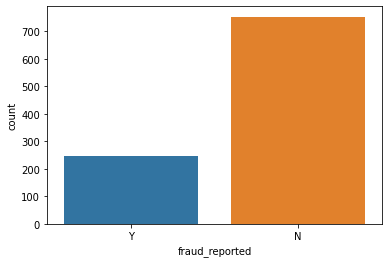

In [11]:
sns.countplot(df['fraud_reported'])

In [12]:
## the data is imbalanced 

In [13]:
df.shape

(1000, 33)

In [14]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
x.shape , y.shape

((1000, 32), (1000,))

In [15]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [16]:
os = RandomOverSampler()

In [17]:
x_res,y_res = os.fit_resample(x,y)

In [18]:
x2 = pd.DataFrame(x_res,columns=x.columns)
y2 = pd.DataFrame(y_res,columns=['fraud_reported'])
x2.shape , y2.shape

((1506, 32), (1506, 1))

In [19]:
df2 = pd.concat((x2,y2),axis=1)
df2.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,2009,N


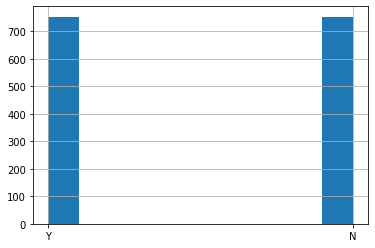

In [20]:
df2['fraud_reported'].hist()

In [21]:
## the data is balanced

In [22]:
for i in df2.columns:
  if df2[i].dtype == 'O':
      print(df2[i].value_counts())
      print('\n')

61     18
140    15
222    14
232    14
255    13
       ..
324     1
321     1
320     1
319     1
0       1
Name: months_as_customer, Length: 391, dtype: int64


43    73
31    72
34    71
41    70
39    68
38    63
33    61
42    58
37    58
32    53
30    53
29    53
46    52
44    49
40    46
28    45
36    43
35    42
26    40
47    40
48    36
57    36
27    31
45    30
23    25
25    21
53    20
50    18
51    18
55    18
60    17
61    17
54    15
49    14
58    14
24    14
56    12
59    10
62     8
21     6
52     6
63     3
22     3
64     2
20     1
19     1
Name: age, dtype: int64


OH    544
IL    511
IN    451
Name: policy_state, dtype: int64


250/500     532
100/300     520
500/1000    454
Name: policy_csl, dtype: int64


500     518
1000    503
2000    485
Name: policy_deductable, dtype: int64


1136.83    9
791.47     8
1483.91    8
1575.74    8
994.74     7
          ..
1332.07    1
1331.69    1
1330.46    1
1328.18    1
1191.80    1
Name: policy_annual_premium, Le

In [23]:
## there are values ? which can be replaced by unknown values

In [24]:
df2['collision_type'] = df2['collision_type'].replace('?','Unknown')
df2['property_damage'] = df2['property_damage'].replace('?','Unknown')
df2['police_report_available'] = df2['police_report_available'].replace('?','Unknown')

In [25]:
df2.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_year',
       'fraud_reported'],
      dtype='object')

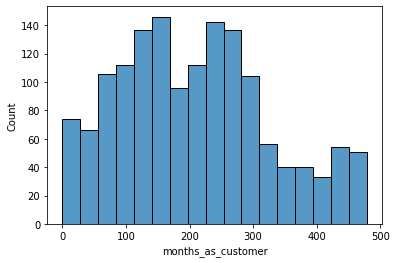

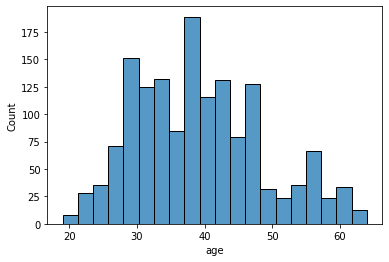

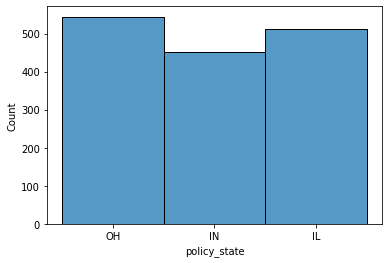

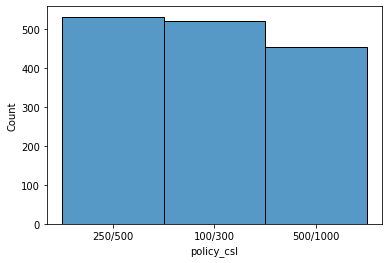

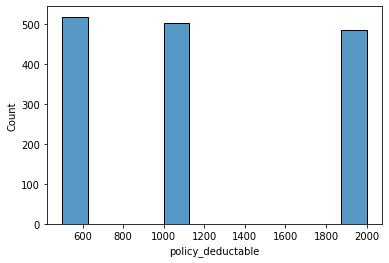

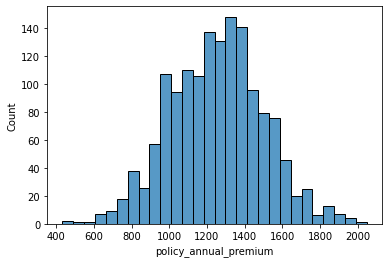

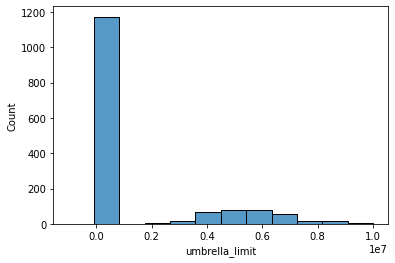

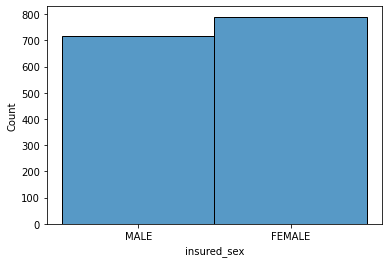

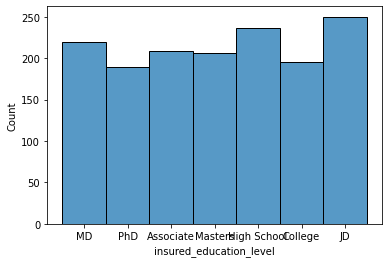

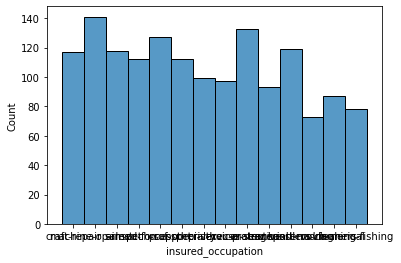

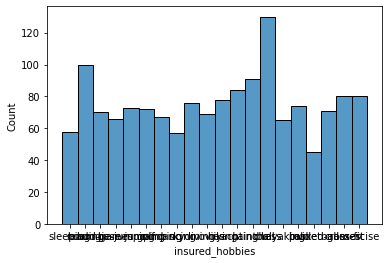

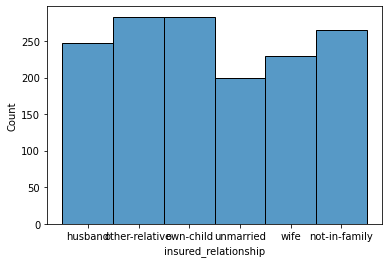

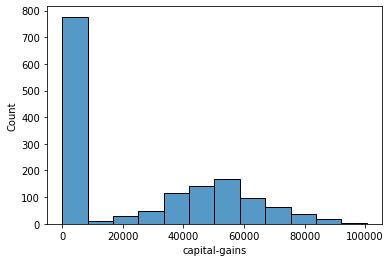

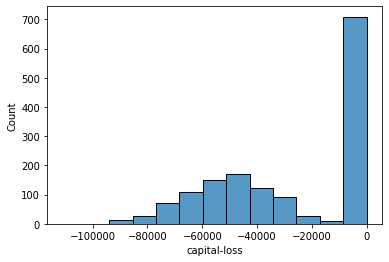

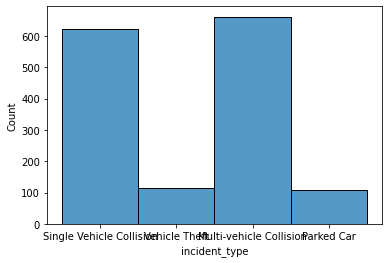

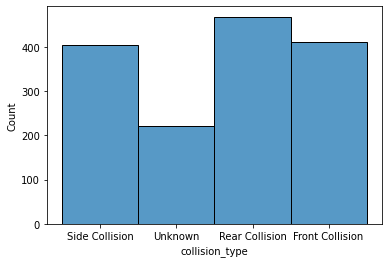

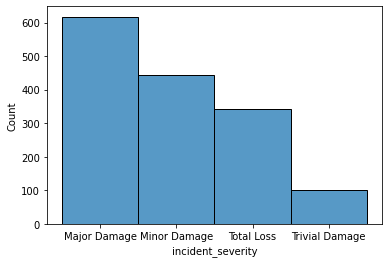

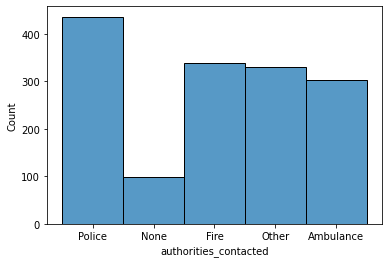

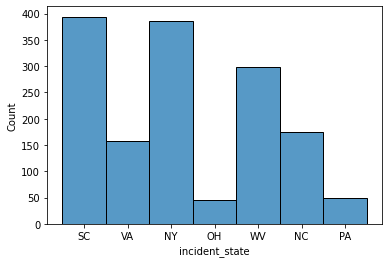

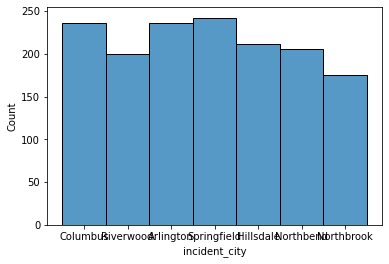

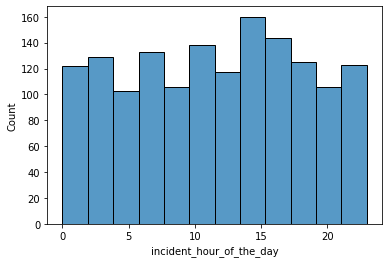

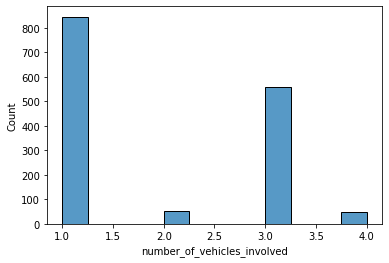

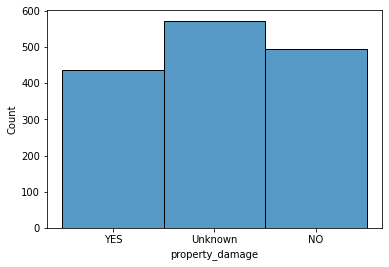

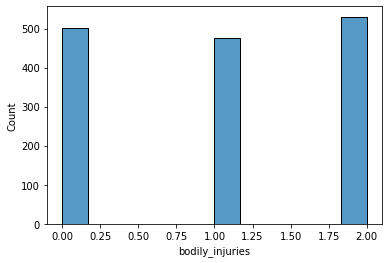

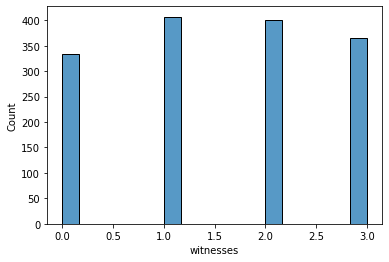

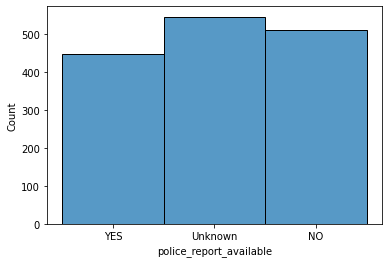

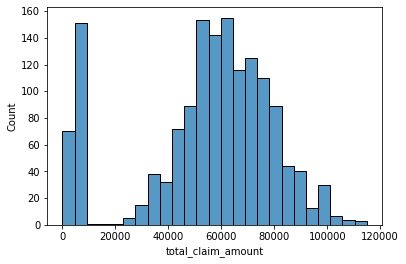

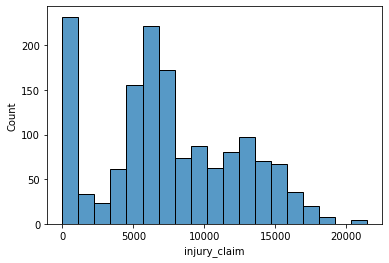

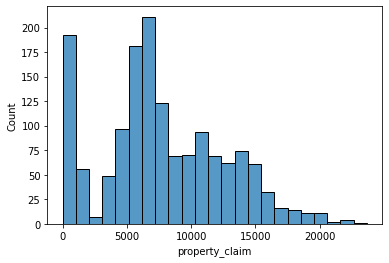

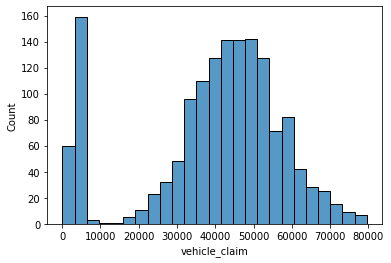

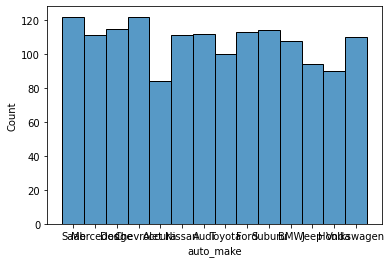

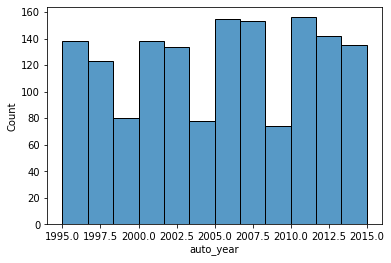

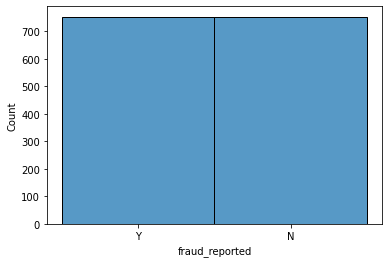

In [26]:
for i in df2.columns:
  sns.histplot(df2[i])
  plt.show()

In [27]:
## removing outliers

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available  

In [35]:
df2['months_as_customer'] = df2['months_as_customer'].astype('int')
df2['age'] = df2['age'].astype('int')
df2['policy_deductable'] = df2['policy_deductable'].astype('int')
df2['policy_annual_premium'] = df2['policy_annual_premium'].astype('float')
df2['umbrella_limit'] = df2['umbrella_limit'].astype('int')
df2['capital-gains'] = df2['capital-gains'].astype('int')
df2['capital-loss'] = df2['capital-loss'].astype('int')
df2['incident_hour_of_the_day'] = df2['incident_hour_of_the_day'].astype('int')
df2['number_of_vehicles_involved'] = df2['number_of_vehicles_involved'].astype('int')
df2['bodily_injuries'] = df2['bodily_injuries'].astype('int')
df2['witnesses'] = df2['witnesses'].astype('int')
df2['total_claim_amount'] = df2['total_claim_amount'].astype('int')
df2['injury_claim'] = df2['injury_claim'].astype('int')
df2['property_claim'] = df2['property_claim'].astype('int')
df2['vehicle_claim'] = df2['vehicle_claim'].astype('int')
df2['auto_year'] = df2['auto_year'].astype('int')

In [37]:
df2.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available  

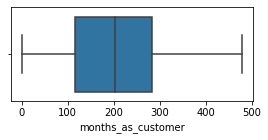

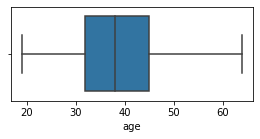

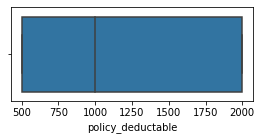

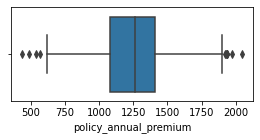

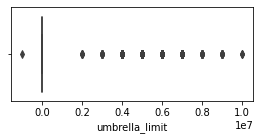

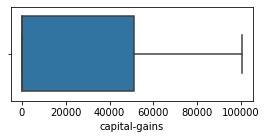

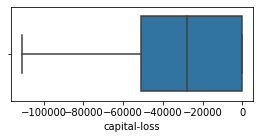

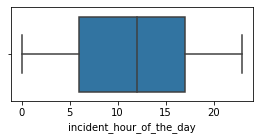

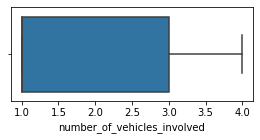

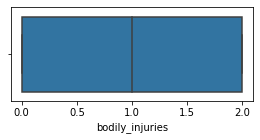

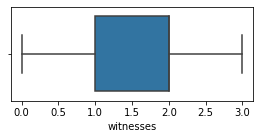

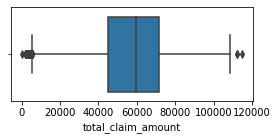

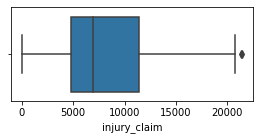

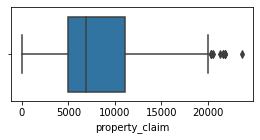

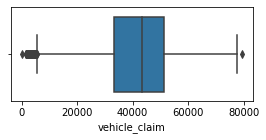

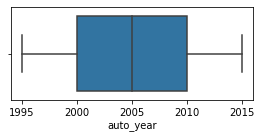

In [38]:
for i in df2.columns:
    if df2[i].dtypes!='O':
        plt.figure(figsize=(20,10))
        plt.subplot(5,4,3)
        sns.boxplot(df2[i])

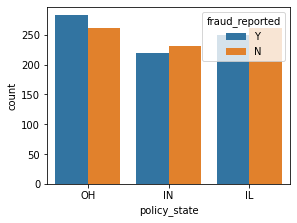

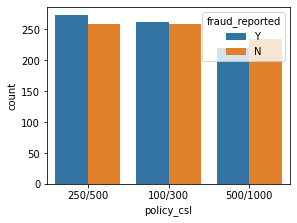

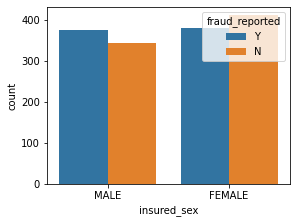

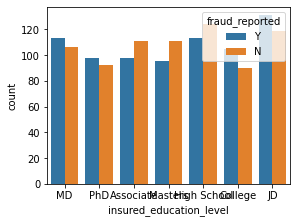

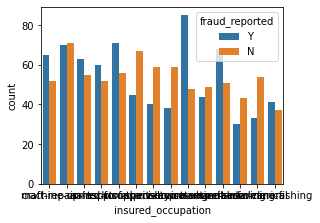

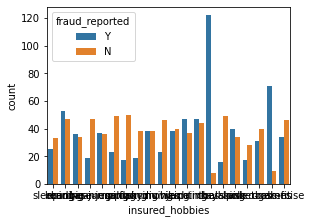

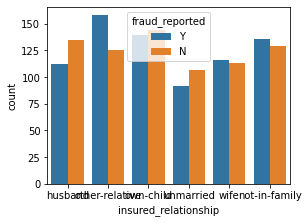

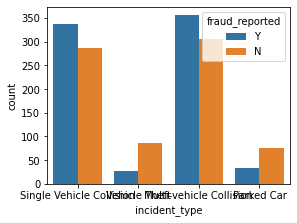

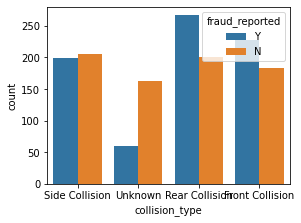

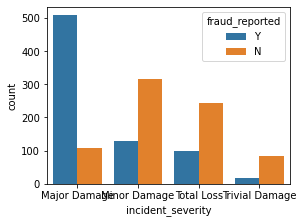

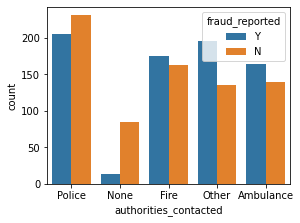

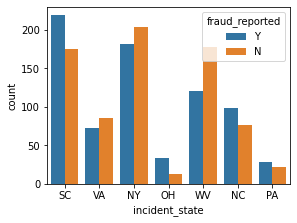

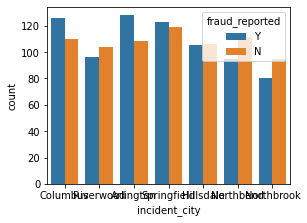

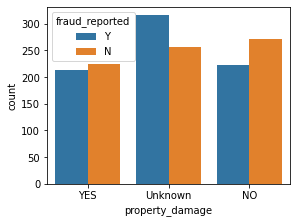

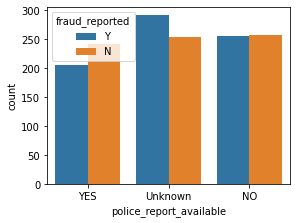

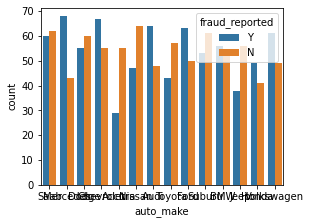

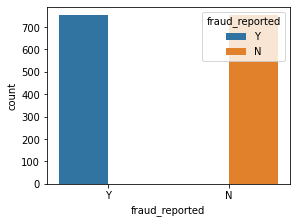

In [40]:
for i in df2.columns:
    if df2[i].dtype=='O':
        plt.figure(figsize=(20,15))
        plt.subplot(4,4,2)
        sns.countplot(df2[i], hue=df2['fraud_reported'])
        plt.show()

In [41]:
pd.crosstab(df2['fraud_reported'],df2['insured_hobbies'])

insured_hobbies,base-jumping,basketball,board-games,bungie-jumping,camping,chess,cross-fit,dancing,exercise,golf,hiking,kayaking,movies,paintball,polo,reading,skydiving,sleeping,video-games,yachting
fraud_reported,,,,,,,,,,,,,,,,,,,,
N,36,28,34,47,50,8,9,38,46,49,40,49,46,44,34,47,38,33,40,37
Y,37,17,36,19,17,122,71,19,34,23,38,16,23,47,40,53,38,25,31,47


In [42]:
pd.crosstab(df2['fraud_reported'],df2['insured_occupation'])

insured_occupation,adm-clerical,armed-forces,craft-repair,exec-managerial,farming-fishing,handlers-cleaners,machine-op-inspct,other-service,priv-house-serv,prof-specialty,protective-serv,sales,tech-support,transport-moving
fraud_reported,,,,,,,,,,,,,,
N,54,52,52,48,37,43,71,59,59,67,49,55,56,51
Y,33,60,65,85,41,30,70,40,38,45,44,63,71,68


In [43]:
pd.crosstab(df2['fraud_reported'],df2['insured_relationship'])

insured_relationship,husband,not-in-family,other-relative,own-child,unmarried,wife
fraud_reported,,,,,,
N,135,129,125,144,107,113
Y,112,136,158,139,92,116


In [44]:
pd.crosstab(df2['fraud_reported'],df2['incident_type'])

incident_type,Multi-vehicle Collision,Parked Car,Single Vehicle Collision,Vehicle Theft
fraud_reported,,,,
N,305,76,286,86
Y,356,33,337,27


In [45]:
pd.crosstab(df2['fraud_reported'],df2['incident_city'])

incident_city,Arlington,Columbus,Hillsdale,Northbend,Northbrook,Riverwood,Springfield
fraud_reported,,,,,,,
N,108,110,106,111,95,104,119
Y,128,126,105,95,80,96,123


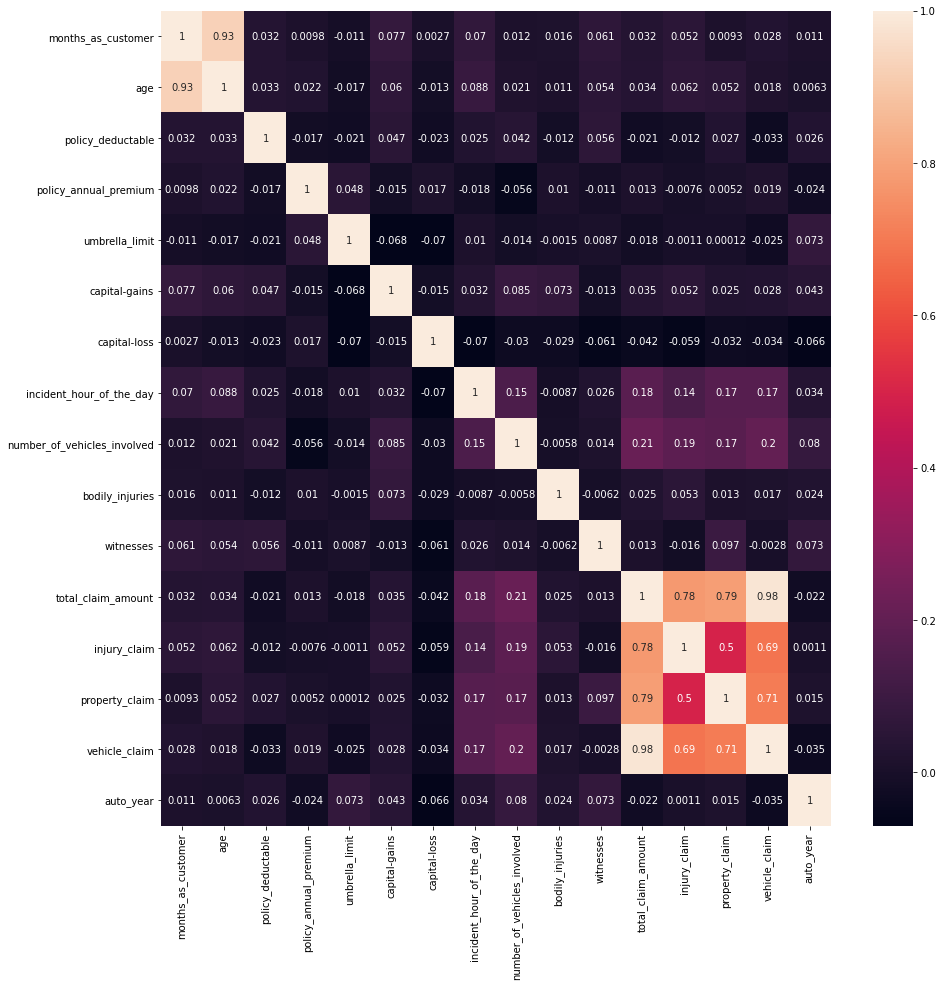

In [48]:
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(),annot=True)

In [49]:
def correlation(dataset, threshold):
    col_corr = set()             # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [51]:
correlation(df2,0.7)    ## these features are highly correlated with each other ..it can be dropped

{'age', 'injury_claim', 'property_claim', 'vehicle_claim'}

In [52]:
df2.drop(['age', 'injury_claim', 'property_claim', 'vehicle_claim'],axis=1,inplace=True)

In [53]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in ['policy_state', 'policy_csl','insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
'authorities_contacted', 'incident_state', 'incident_city','property_damage', 'police_report_available', 'auto_make', 'fraud_reported']:
    df2[i]=lb.fit_transform(df2[i])
df2.head()

,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_year,fraud_reported
0,328,2,1,1000,1406.91,0,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,2,1,2,2,71610,10,2004,1
1,228,1,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,3,1,4,5,5,8,1,1,0,0,1,5070,8,2007,1
2,134,2,0,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,34650,4,2007,0
3,256,0,1,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,1,1,1,2,0,63400,3,2014,1
4,228,0,2,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,3,1,2,1,0,20,1,0,0,1,0,6500,0,2009,0


In [54]:
from scipy.stats import zscore
z=zscore(df2)
print(df2.shape)
df3=df2[(z<3).all(axis=1)]
print(df3.shape)

(1506, 29)
(1488, 29)


In [56]:
##checking skewness

skewness value of months_as_customer  : 0.3757611597170732




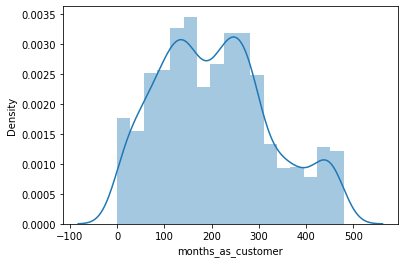

skewness value of policy_state  : -0.05680431413435955




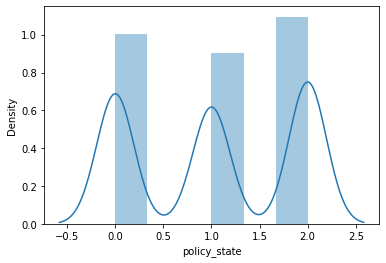

skewness value of policy_csl  : 0.08749215112790586




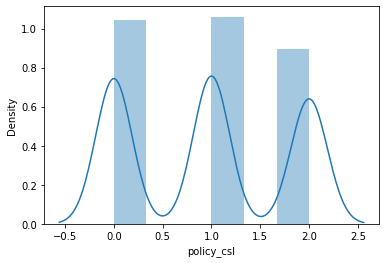

skewness value of policy_deductable  : 0.4259031176107447




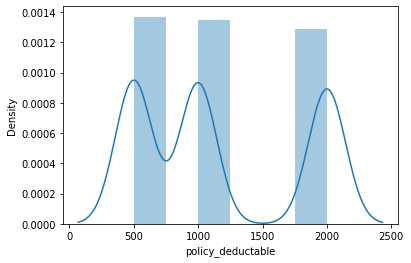

skewness value of policy_annual_premium  : 0.017227934932491452




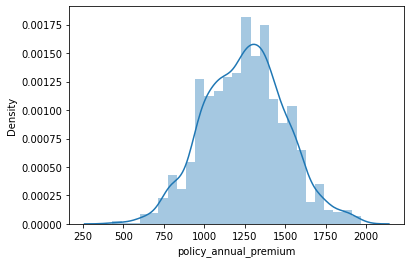

skewness value of umbrella_limit  : 1.667966237423261




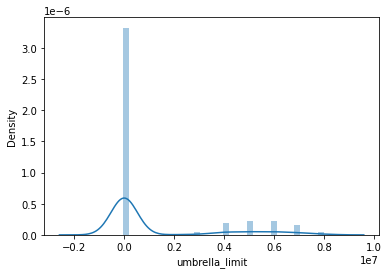

skewness value of insured_sex  : 0.09958558889554195




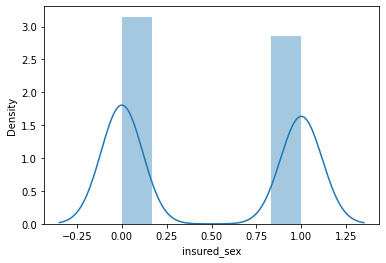

skewness value of insured_education_level  : 0.01409135946730921




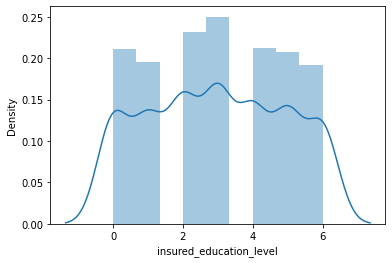

skewness value of insured_occupation  : -0.014179417121785819




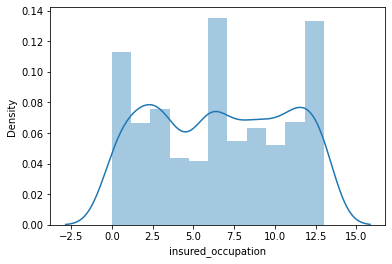

skewness value of insured_hobbies  : -0.012439702504468794




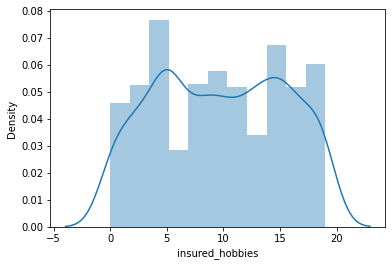

skewness value of insured_relationship  : 0.09221045549723227




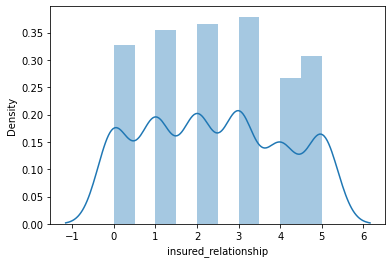

skewness value of capital-gains  : 0.5068702453322568




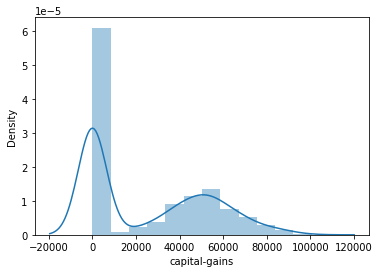

skewness value of capital-loss  : -0.3724377423965058




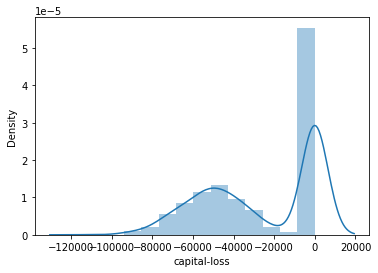

skewness value of incident_type  : 0.10516764522231777




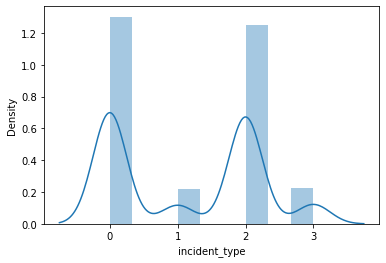

skewness value of collision_type  : 0.2138017099982686




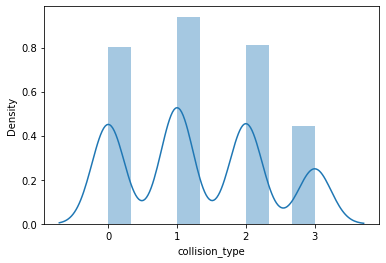

skewness value of incident_severity  : 0.5684229143227081




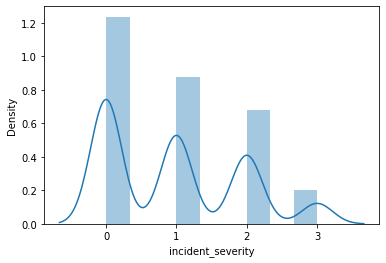

skewness value of authorities_contacted  : -0.13246057774942066




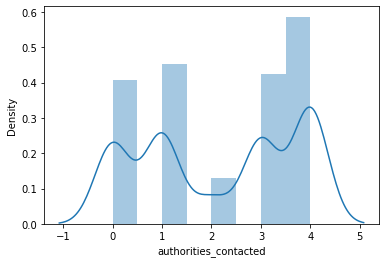

skewness value of incident_state  : -0.12156742001383117




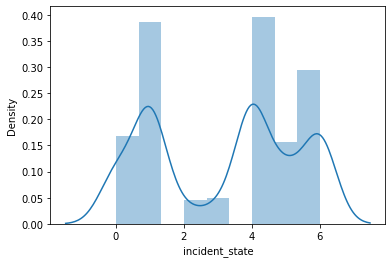

skewness value of incident_city  : 0.08022940068805587




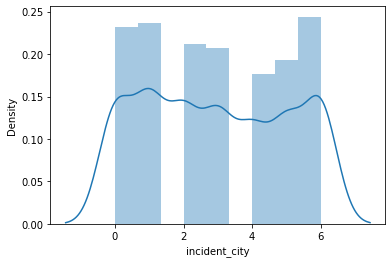

skewness value of incident_hour_of_the_day  : -0.03883059914112653




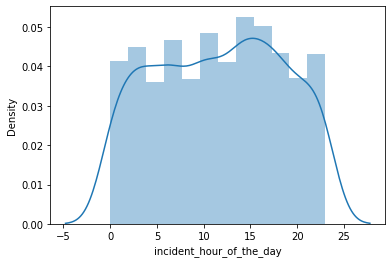

skewness value of number_of_vehicles_involved  : 0.4443858101523079




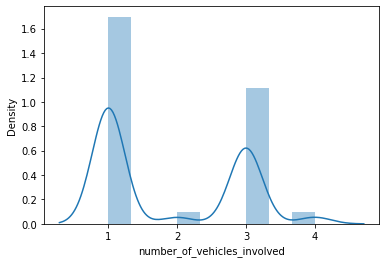

skewness value of property_damage  : 0.062772988933542




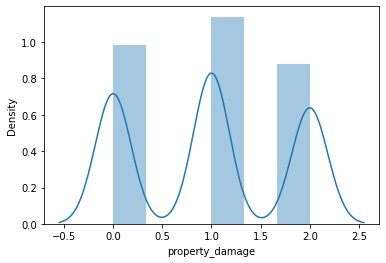

skewness value of bodily_injuries  : -0.04741952649298433




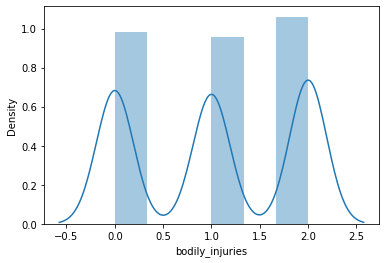

skewness value of witnesses  : -0.020710557901700236




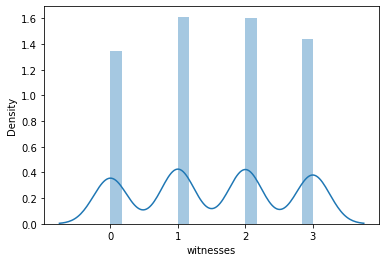

skewness value of police_report_available  : 0.06995619625251187




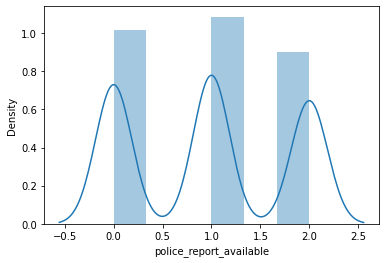

skewness value of total_claim_amount  : -0.6940429666827324




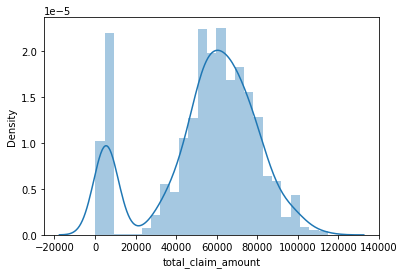

skewness value of auto_make  : -0.008316141963847504




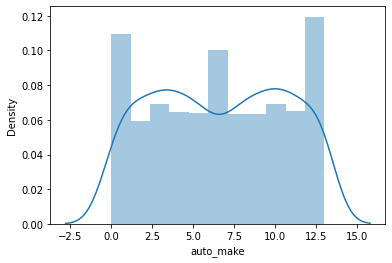

skewness value of auto_year  : -0.05171997343030058




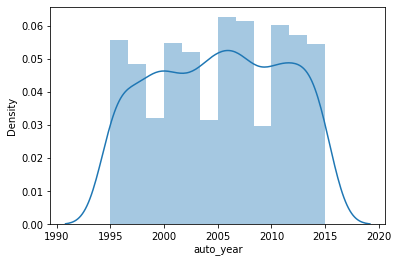

skewness value of fraud_reported  : 0.010752843579045109




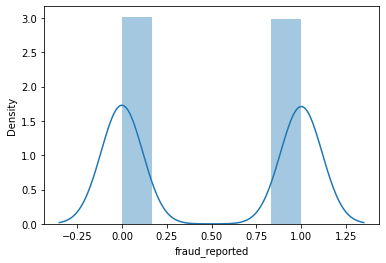

In [58]:
from scipy.stats import skew
for i in df3.columns:
  print('skewness value of',i,' :',skew(df3[i]))
  print('\n')
  plt.figure()
  sns.distplot(df3[i])
  plt.show()

In [61]:
## there are no significant skewness present in the data

In [62]:
x=df3.iloc[:,0:-1]
y=pd.DataFrame(df3.iloc[:,-1])

In [63]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1.016428,1.160175,0.060288,-0.243261,0.627638,-0.498100,1.051032,0.532057,-1.136391,1.288839,-1.450886,1.007403,0.962851,0.811141,0.686354,-0.997838,1.185041,0.386069,-0.941193,-0.966288,-0.848813,1.316270,-0.030951,0.440194,1.301858,0.653753,0.848161,-0.188996
1,0.173112,-0.036180,0.060288,1.369090,-0.220915,1.688252,1.051032,0.532057,-0.152279,0.936141,-0.248481,-0.894005,0.962851,1.748964,1.665544,0.051479,1.185041,0.857720,0.997879,-0.527745,-0.848813,0.045271,-1.242917,-1.402305,0.048841,-1.967694,0.348235,0.311407
2,-0.619605,1.160175,-1.185665,1.369090,0.652849,1.688252,-0.951446,1.560239,1.077860,-1.356392,0.352722,0.358142,0.962851,-1.064504,-0.292836,0.051479,1.185041,-1.028883,-0.941193,-0.673926,1.104835,-1.225728,1.181015,1.361443,-1.204176,-0.802344,-0.651618,0.311407
3,0.409241,-1.232535,0.060288,1.369090,0.663371,2.125522,-0.951446,1.560239,-1.382419,-1.356392,0.953924,0.850439,-1.281690,0.811141,-1.272026,-0.997838,1.185041,-0.557233,-1.425961,-0.966288,-0.848813,0.045271,-0.030951,0.440194,-1.204176,0.330308,-0.901581,1.479015
4,0.173112,-1.232535,1.306241,-0.243261,1.343905,2.125522,1.051032,-1.524308,1.077860,-1.356392,0.953924,1.460459,-0.691778,1.748964,1.665544,0.051479,-0.107257,-1.028883,-1.425961,1.226427,-0.848813,-1.225728,-1.242917,-0.481056,-1.204176,-1.911357,-1.651471,0.645009


In [68]:
y.head()

,fraud_reported
0,1
1,1
2,0
3,1
4,0


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [65]:
def max_acc_score(reg,x,y):
    max_score=0
    for r_state in range (42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        acc_score=accuracy_score(test_y,pred)
        print("The accuracy score at r_state", r_state, "is", acc_score)
        if acc_score>max_score:
            max_score=acc_score
            final_r_state=r_state
    print("The maximum accuracy score", max_score, "is achieved at", final_r_state)
    return max_score

In [66]:
lg=LogisticRegression()
max_acc_score(lg,x,y)

The accuracy score at r_state 42 is 0.7281879194630873
The accuracy score at r_state 43 is 0.7583892617449665
The accuracy score at r_state 44 is 0.7214765100671141
The accuracy score at r_state 45 is 0.7181208053691275
The accuracy score at r_state 46 is 0.7114093959731543
The accuracy score at r_state 47 is 0.7449664429530202
The accuracy score at r_state 48 is 0.7483221476510067
The accuracy score at r_state 49 is 0.7785234899328859
The accuracy score at r_state 50 is 0.7516778523489933
The accuracy score at r_state 51 is 0.6912751677852349
The accuracy score at r_state 52 is 0.7281879194630873
The accuracy score at r_state 53 is 0.7583892617449665
The accuracy score at r_state 54 is 0.7550335570469798
The accuracy score at r_state 55 is 0.697986577181208
The accuracy score at r_state 56 is 0.7214765100671141
The accuracy score at r_state 57 is 0.7449664429530202
The accuracy score at r_state 58 is 0.7315436241610739
The accuracy score at r_state 59 is 0.7181208053691275
The accurac

0.7953020134228188

In [67]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=79,test_size=0.20)

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(train_x,train_y)
gdkn.best_params_

{'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'distance'}

In [70]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x,train_y)
gddt.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [71]:
from sklearn.svm import SVC
sv=SVC()
parameters={'C':(1,10),'kernel':('linear','poly','rbf')}
gdsv=GridSearchCV(sv,parameters)
gdsv.fit(train_x,train_y)
gdsv.best_params_

{'C': 10, 'kernel': 'rbf'}

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
The accuracy score is  0.7953020134228188
The cross val score is 0.7318780647639708

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       153
           1       0.78      0.80      0.79       145

    accuracy                           0.80       298
   macro avg       0.80      0.80      0.80       298
weighted avg       0.80      0.80      0.80       298


[[121  32]
 [ 29 116]]

roc_auc_score 0.7954248366013073


AxesSubplot(0.125,0.808774;0.62x0.0712264)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
       

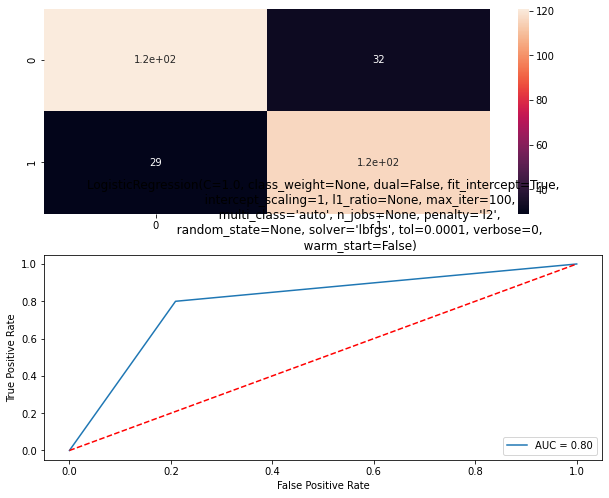

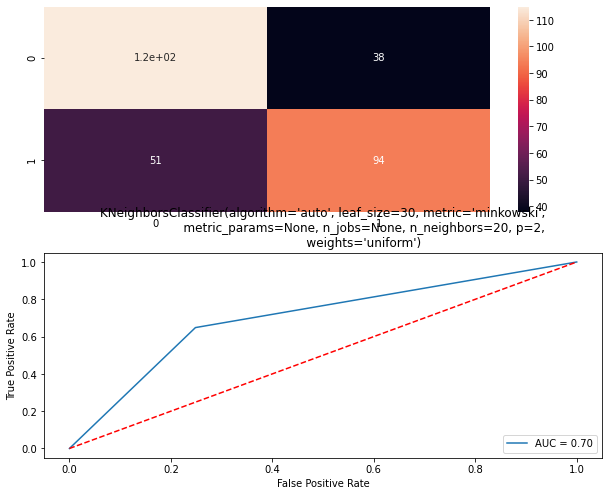

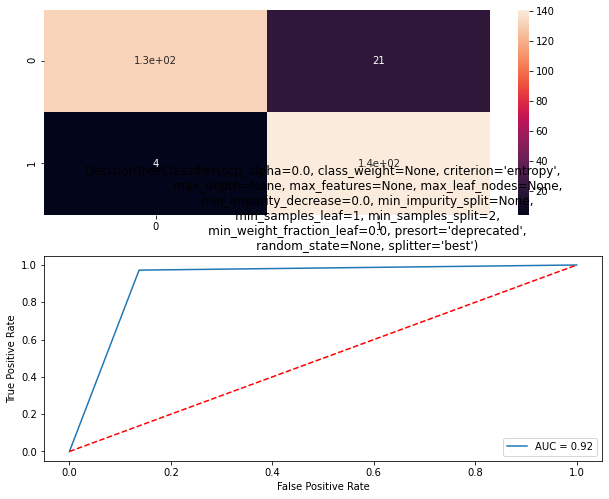

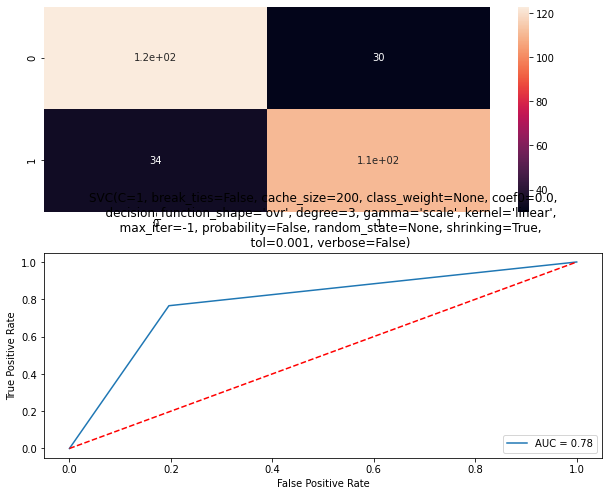

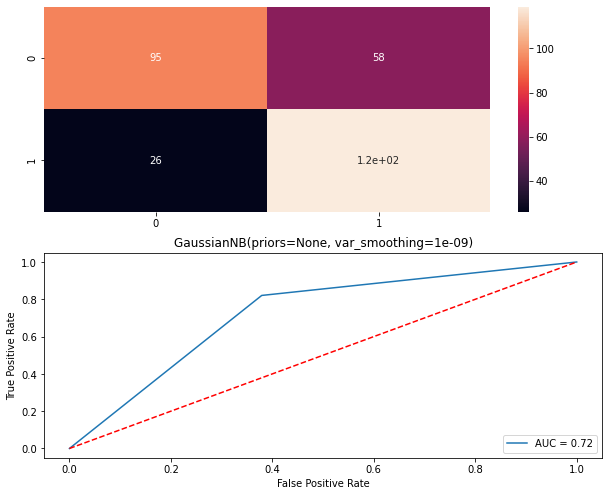

In [72]:
from sklearn.metrics import accuracy_score, auc, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.naive_bayes import GaussianNB

score=[]
cv=[]
rocscore=[]


algorithms=[lg,KNeighborsClassifier(algorithm='auto', n_neighbors= 20, weights='uniform'), DecisionTreeClassifier(criterion= 'entropy', splitter= 'best'), SVC(C=1, kernel='linear'),GaussianNB()]

for i in algorithms:
    print(i)
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    accscore=accuracy_score(test_y,pred)
    score.append(accscore)
    print("The accuracy score is ", accscore)
    cvscore=cross_val_score(i,x,y,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(test_y,pred))
    print()
    cm=confusion_matrix(test_y,pred)
    print(cm)
    print()
    false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n")
    print("\n")

In [73]:
result=pd.DataFrame({'Model':[LogisticRegression,KNeighborsClassifier, DecisionTreeClassifier, SVC,GaussianNB()],'Accuracy_Score':score,'Cross_val_score':cv, 'AUC_ROC':rocscore})
result

,Model,Accuracy_Score,Cross_val_score,AUC_ROC
0,<class 'sklearn.linear_model._logistic.Logisti...,0.795302,0.731878,0.795425
1,<class 'sklearn.neighbors._classification.KNei...,0.701342,0.658638,0.699955
2,<class 'sklearn.tree._classes.DecisionTreeClas...,0.916107,0.913326,0.917579
3,<class 'sklearn.svm._classes.SVC'>,0.785235,0.743981,0.784719
4,"GaussianNB(priors=None, var_smoothing=1e-09)",0.718121,0.696262,0.720802


In [74]:
## DecisionTreeClassifier in giving good results

In [75]:
## trying boosting algorithms

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
parameters={'n_estimators':(10,50,100,200,500)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x,train_y)
gdrf.best_params_

{'n_estimators': 200}

In [77]:
rf=RandomForestClassifier(n_estimators=200)
max_acc_score(rf,x,y)

The accuracy score at r_state 42 is 0.889261744966443
The accuracy score at r_state 43 is 0.9395973154362416
The accuracy score at r_state 44 is 0.9026845637583892
The accuracy score at r_state 45 is 0.8959731543624161
The accuracy score at r_state 46 is 0.9261744966442953
The accuracy score at r_state 47 is 0.9161073825503355
The accuracy score at r_state 48 is 0.9362416107382551
The accuracy score at r_state 49 is 0.9161073825503355
The accuracy score at r_state 50 is 0.912751677852349
The accuracy score at r_state 51 is 0.9093959731543624
The accuracy score at r_state 52 is 0.912751677852349
The accuracy score at r_state 53 is 0.9362416107382551
The accuracy score at r_state 54 is 0.9093959731543624
The accuracy score at r_state 55 is 0.9194630872483222
The accuracy score at r_state 56 is 0.8993288590604027
The accuracy score at r_state 57 is 0.9026845637583892
The accuracy score at r_state 58 is 0.9295302013422819
The accuracy score at r_state 59 is 0.9261744966442953
The accuracy 

0.9563758389261745

In [78]:
cs=cross_val_score(rf,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of Random forest classifier is", cs)

The cross val score of Random forest classifier is 0.9207262784443992


In [79]:
from sklearn.ensemble import GradientBoostingClassifier
gc=GradientBoostingClassifier()
parameters={'learning_rate':(0.001,0.01,0.1,1),'n_estimators':(50,100,200,500),'criterion':('friedman_mse', 'mse', 'mae')}
gd=GridSearchCV(gc,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'n_estimators': 500}

In [80]:
gc=GradientBoostingClassifier(criterion='friedman_mse', learning_rate= 0.1, n_estimators= 500)
max_acc_score(gc,x,y)

The accuracy score at r_state 42 is 0.9161073825503355
The accuracy score at r_state 43 is 0.9362416107382551
The accuracy score at r_state 44 is 0.9228187919463087
The accuracy score at r_state 45 is 0.912751677852349
The accuracy score at r_state 46 is 0.9194630872483222
The accuracy score at r_state 47 is 0.9161073825503355
The accuracy score at r_state 48 is 0.9261744966442953
The accuracy score at r_state 49 is 0.912751677852349
The accuracy score at r_state 50 is 0.9161073825503355
The accuracy score at r_state 51 is 0.9026845637583892
The accuracy score at r_state 52 is 0.912751677852349
The accuracy score at r_state 53 is 0.9362416107382551
The accuracy score at r_state 54 is 0.9228187919463087
The accuracy score at r_state 55 is 0.9429530201342282
The accuracy score at r_state 56 is 0.9261744966442953
The accuracy score at r_state 57 is 0.9228187919463087
The accuracy score at r_state 58 is 0.9429530201342282
The accuracy score at r_state 59 is 0.9328859060402684
The accuracy 

0.9530201342281879

In [81]:
cs=cross_val_score(gc,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of GradientBoosting classifier is", cs)

The cross val score of GradientBoosting classifier is 0.9294556301267711


In [82]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
parameters={'learning_rate':(0.001,0.01,0.1,1),'n_estimators':(50,100,200,500),'algorithm':('SAMME', 'SAMME.R')}
gd=GridSearchCV(ad,parameters)
gd.fit(train_x,train_y)
gd.best_params_


{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 100}

In [83]:
ada=AdaBoostClassifier(algorithm= 'SAMME', learning_rate= 0.1, n_estimators= 100)
max_acc_score(ada,x,y)

The accuracy score at r_state 42 is 0.8624161073825504
The accuracy score at r_state 43 is 0.9026845637583892
The accuracy score at r_state 44 is 0.8322147651006712
The accuracy score at r_state 45 is 0.8489932885906041
The accuracy score at r_state 46 is 0.8590604026845637
The accuracy score at r_state 47 is 0.8590604026845637
The accuracy score at r_state 48 is 0.8859060402684564
The accuracy score at r_state 49 is 0.8657718120805369
The accuracy score at r_state 50 is 0.8590604026845637
The accuracy score at r_state 51 is 0.8456375838926175
The accuracy score at r_state 52 is 0.825503355704698
The accuracy score at r_state 53 is 0.8859060402684564
The accuracy score at r_state 54 is 0.8691275167785235
The accuracy score at r_state 55 is 0.8624161073825504
The accuracy score at r_state 56 is 0.8657718120805369
The accuracy score at r_state 57 is 0.8657718120805369
The accuracy score at r_state 58 is 0.8758389261744967
The accuracy score at r_state 59 is 0.8557046979865772
The accurac

0.9026845637583892

In [84]:
cs=cross_val_score(ada,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of AdaBoost classifier is", cs)

The cross val score of AdaBoost classifier is 0.8609088649357105


In [85]:
result_boosters=pd.DataFrame({'Boosters':['RandomForestClassifier','GradientBoostClassifier','AdaBoostRegressor'],'Accuracy Score':[0.95,0.95,0.90],'Cross_val_score':[0.92,0.92,0.86]})
result_boosters

,Boosters,Accuracy Score,Cross_val_score
0,RandomForestClassifier,0.95,0.92
1,GradientBoostClassifier,0.95,0.92
2,AdaBoostRegressor,0.90,0.86


In [86]:
##random forest and gradient booster is the best model

In [87]:
import joblib
joblib.dump(gc,'InsuranceFraud.pkl')

['InsuranceFraud.pkl']